# Capstone Project Part I: Initial Data Report

**Overview**: In this Capstone Project, my goal is to develop a baseline model for a dataset containing spatial coordinates of various people doing deadlifts over time. The original idea was to build the data myself using pre-made videos of people doing squats and/or deadlifts, but due to time constraints, I used an existing dataset.  



### Getting Started

Our dataset comes from Kaggle [link](https://www.kaggle.com/datasets/venkatagandreti/deadlift-proper-lean-positions?resource=download).  

This dataset captures the biomechanical variations in lean positions during a deadlift, categorized into right lean, neutral position, and left lean. It provides a structured set of coordinates to facilitate detailed analysis of body posture and motion dynamics during this exercise.

Dataset Highlights:
Type: Numerical data of coordinates representing different lean positions.
Categories:
Right Lean: Body tilted to the right during the deadlift.
Neutral: Symmetrical and balanced posture.
Left Lean: Body tilted to the left during the deadlift.
Applications:
Biomechanical and ergonomic studies
Assessment of lifting techniques and postural imbalances
Development of machine learning models for posture detection
Injury prevention and fitness optimization
Target Audience:
This dataset is a valuable resource for researchers, fitness professionals, and data scientists interested in:

Analyzing postural variations during deadlifts.
Identifying potential risks or inefficiencies in lifting techniques.
Training AI models for posture classification.
File Format:
Provided in an easy-to-use Excel file (.xlsx), the dataset includes clear labels and coordinate data for each lean category, ensuring compatibility with analytical tools like Python, R, and Excel.



### Import Libraries:

In [154]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
import seaborn as sns
import joblib



Read and analyze data characteristics and missing values

In [155]:
deadlift_leans = pd.read_excel("data/Lean_Up_Down.xlsx")

In [156]:
deadlift_leans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 133 entries, class to v(33)
dtypes: float64(132), object(1)
memory usage: 525.9+ KB


In [157]:
deadlift_leans.head()

,class,x(1),y(1),z(1),v(1),x(2),y(2),z(2),v(2),x(3),...,z(31),v(31),x(32),y(32),z(32),v(32),x(33),y(33),z(33),v(33)
0,right,0.408363,0.343583,-0.205024,0.999969,0.410037,0.329441,-0.196978,0.999851,0.412525,...,0.187932,0.884979,0.471598,0.977845,0.026207,0.989654,0.417298,0.968315,0.112930,0.987596
1,right,0.403518,0.351661,-0.193637,0.999971,0.404802,0.338355,-0.185784,0.999859,0.407097,...,0.174833,0.867510,0.470104,0.976877,0.022118,0.987352,0.417031,0.973668,0.098876,0.985141
2,right,0.398337,0.355058,-0.213196,0.999974,0.399678,0.341999,-0.205672,0.999870,0.401907,...,0.191932,0.865473,0.469508,0.977041,0.037704,0.987422,0.416934,0.970681,0.116003,0.985368
3,right,0.390192,0.362887,-0.198765,0.999979,0.390951,0.347643,-0.193169,0.999893,0.393168,...,0.161936,0.880264,0.469738,0.977633,0.024460,0.988665,0.415238,0.969858,0.088767,0.987039
4,right,0.387154,0.365171,-0.192261,0.999985,0.387806,0.350596,-0.186136,0.999926,0.389886,...,0.140248,0.872530,0.469373,0.973640,0.026472,0.983936,0.415307,0.966856,0.067620,0.983888


In [158]:
deadlift_leans.isnull().sum()

class    0
x(1)     0
y(1)     0
z(1)     0
v(1)     0
        ..
v(32)    0
x(33)    0
y(33)    0
z(33)    0
v(33)    0
Length: 133, dtype: int64

The dataset contains no missing values, so we can assign the appropriate inputs and outputs. 

In [159]:
X = deadlift_leans.drop(columns=['class'])
y = deadlift_leans['class']
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

We can use the DummyClassifier approach to build a baseline model with the most frequent values in the dataset. 

In [161]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)
print("Baseline Classifier (Most Frequent) Report:")
print(classification_report(y_test, dummy_preds, target_names=le.classes_))

Baseline Classifier (Most Frequent) Report:
              precision    recall  f1-score   support

        left       0.37      1.00      0.54        38
neutral_lean       0.00      0.00      0.00        37
       right       0.00      0.00      0.00        27

    accuracy                           0.37       102
   macro avg       0.12      0.33      0.18       102
weighted avg       0.14      0.37      0.20       102



c:\Users\achan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\achan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\achan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We have established that the baseline model has an accuracy of 37 percent, and only predicts the majority class which is a 'left' deadlift lean. Now we can compare a LogisticRegression() model with hyperparameter tuning and GridSearch to find the most optimum parameters. 

In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train_scaled, y_train)
best_logreg = grid_logreg.best_estimator_
log_preds = best_logreg.predict(X_test_scaled)
print("Best Logistic Regression Parameters:", grid_logreg.best_params_)
print("Logistic Regression Report:")
print(classification_report(y_test, log_preds, target_names=le.classes_))


Best Logistic Regression Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Report:
              precision    recall  f1-score   support

        left       0.97      0.95      0.96        38
neutral_lean       0.88      0.78      0.83        37
       right       0.78      0.93      0.85        27

    accuracy                           0.88       102
   macro avg       0.88      0.89      0.88       102
weighted avg       0.89      0.88      0.88       102



In [164]:
print("Logistic Regression:", cross_val_score(best_logreg, X_train_scaled, y_train, cv=5).mean())

Logistic Regression: 0.9356481481481481


We can see significantly improved performance with an optimized LogisticRegression model, with an accuracy of 88.9 percent. 

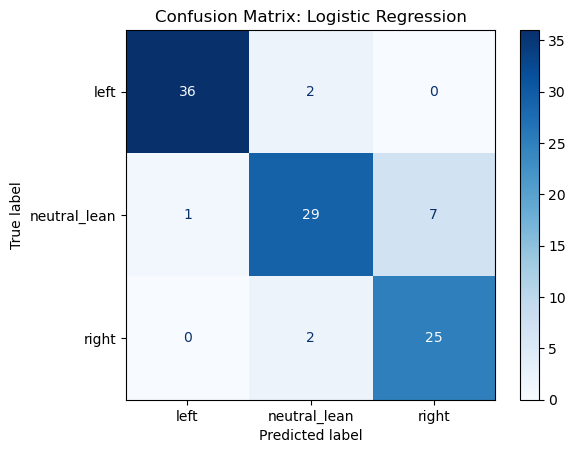

In [165]:
cm = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix: Logistic Regression")
plt.show()

The confusion matrix highlights the accuracy of the optimized Logistic Regression model. Within the test set of data, both left and right deadlift lean labels yield similar results, with the neutral having slightly more incorrect predictions for left and right predicted deadlift leans.   

### Path Forward:

Now that we have established a baseline model, the next step is to identify the most important features within this dataset. We can do this using either the decision tree or random forest classifer. Using those, we can optimize our model even further, and compare our performance against several different models. 